In [99]:
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

In [2]:
data = pandas.read_csv('Crime_Data_from_2010_to_Present.csv')
data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [69]:
df = data[['Crime Code','Victim Age', 'Victim Sex','Victim Descent']]
df.columns = ['Crime_Code','Victim_Age', 'Victim_Sex','Victim_Descent']
df = df.dropna()
df.head()

,Crime_Code,Victim_Age,Victim_Sex,Victim_Descent
0,626,30.0,F,W
4,745,84.0,M,W
5,110,49.0,F,W
9,668,27.0,F,O
12,440,42.0,M,H


In [70]:
top10_crime = data["Crime Code"].value_counts()[:10].index

In [76]:
df[(df['Victim_Age'] >= 100) & (df['Victim_Age'] < 110)]

,Crime_Code,Victim_Age,Victim_Sex,Victim_Descent


In [77]:
age_bin = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data_age_bin = list()
for index in range(9):
    data_age_bin.append(df[(df['Victim_Age'] >= age_bin[index]) & (df['Victim_Age'] < age_bin[index + 1])])

In [95]:
percent_age_bin = list()
for index in range(9):
    data_temp = data_age_bin[index]
    percent = list()
    for i in top10_crime:
        percent.append(data_temp[data_temp['Crime_Code'] == i]['Crime_Code'].count())
    count1 = sum(percent)
    percent_age_bin.append([ item * 1.0 / count1 for item in percent])

In [125]:
colors = cm.rainbow(np.linspace(0, 1, 10))
for i in range(len(percent_age_bin)):
    base = 0;
    percent = percent_age_bin[i]
    for j in range(len(percent)):
        plt.bar(i, percent[j] * 100, bottom = base, align='center', alpha=0.8, color=colors[j])
        base = base + percent[j] * 100

In [126]:
y_pos = range(10)
top_10 = ['10-20', '20-30', '30-40','40-50','50-60','60-70','70-80','80-90','90-100']
plt.xticks(y_pos, top_10, rotation=45)
plt.ylabel('Percentile')
plt.xlabel('Age Bin')
plt.title('Crime Distribution in 9 age range')

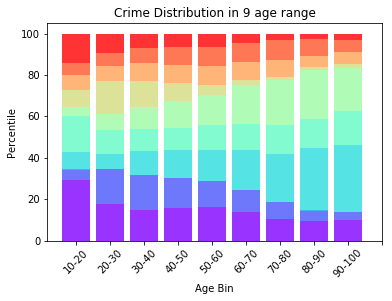

In [127]:
plt.show()

In [109]:
print top10_crime

Int64Index([624, 330, 510, 310, 440, 354, 626, 740, 745, 230], dtype='int64')
